## Tutorial 5. Create channels for a drainage basin


In this tutorial we will use the Network object created in tutorial 1 to extract all the channels for the Guadalfeo main basin. For this we will use the BNetwork object, which represents the channels of a drainage basin within a watershed. 
The channels of a basin run from one of the heads of the network to the basin outlet (main channel) or towards a previous channel. The BNetwork object sorts all heads in the network based on their elevation so that those with the highest elevation are processed first. When creating the BNetwork object it is possible to indicate the main headers to be processed first. 

>- `BNetwork(net, basingrid=None, heads=None, bid=1)`
    - `net` (Network) Network instance
    - `basingrid` (Grid) Grid instance with the drainage basins
    - `heads` (array) 2 columns numpy array with the coordinates of the heads. If array has a third column of indexes, heads will be sorted according these indexes. If None, all heads of the Network will be sort by their elevation.
    - `bid` (int) Id of the basin in the basingrid object. 



### 1. Load Flow from previous tutorial and create the Guadalfeo main basin

To load a previously created Flow object (saved as .tif file), simply call the **Flow** class with the path as unique attribute.

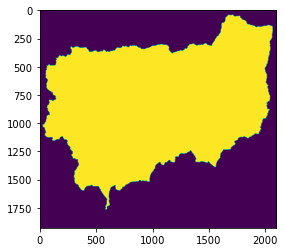

In [12]:
from landspy import Flow, Network, Grid

# Load Flow object from tutorial 1 and create the Guadalfeo basin
# We will use as outlet the point [448913, 4064543]
fd = Flow("data/guadalfeo25_fd.tif")
outlet = [448913, 4064543]
basin = fd.drainageBasins(outlet)
basin.plot()

### 2. Load a previously created Network object

To load a previously created Network object (saved as *.dat file), simply call the Network class with the path as unique attribute

In [13]:
from landspy import Network

# Load a previously saved Network object. 
net = Network("data/guadalfeo_net1600.dat")

### 3. Load heads from a shapefile

In this example, we will use the heads of the main basins to ensure that they are processed first. All other heads in the network will then be processed according to their elevation.
To get the coordinates of heads from the **main_heads.shp** file inside the data folder, we can use the landspy function `extract_points(path, id="")`. Note that in this file, the Guadalfeo river has the id=1, contrary to the other examples. This is to ensure that Guadalfeo river is the main river of the basin. 

In [14]:
# We extract the main heads from a shapefile
from landspy import extract_points

heads = extract_points("data/main_heads.shp", "id")
heads

array([[4.85106253e+05, 4.10424731e+06, 1.00000000e+00],
       [4.78757464e+05, 4.10657256e+06, 2.00000000e+00],
       [4.71258894e+05, 4.10002188e+06, 3.00000000e+00],
       [4.64685148e+05, 4.09507136e+06, 4.00000000e+00],
       [4.63760324e+05, 4.09852172e+06, 5.00000000e+00],
       [4.55736854e+05, 4.09079592e+06, 6.00000000e+00],
       [4.58961239e+05, 4.09579644e+06, 7.00000000e+00],
       [4.62260610e+05, 4.09942181e+06, 8.00000000e+00]])

### 3. Create the BNetwork object

To create the BNetwork object, we will use the class BNetwork. Heads will be snapped to existing Network heads. As the basins Grid has two basin, we have to set the argument bid=2, to process the larger one. 


In [16]:
from landspy import BNetwork

# Create the BNetwork
bnet = BNetwork(net, basin, heads, bid=1)

### 4. Extract all the channels of the basin and plot them

BNetwork channels can be extracted with the method `getChannels()`. This function returns a list of channels. 

>- `getChannels(nchannels=None, min_length=0)`
    - `nchannels` (int // None // "ALL") Number of channel that will be returned. If None (default) only channels corresponding to Channel heads will be returned, otherwise, an specific number of channels will return. If nchannels is greater than the Channel main heads, other channel will be returned for Network heads (sorted by elevation). To get all channels in the basin pass "ALL"
    - `min_length` Minimun channel length. Channels of the BNetwork with lower lengths will be discarded

To create a Chi plot with all the channels, we can extract all channels and plot Chi values in the same graphic or use the method `chiPlot()`. The main channel (first channel of the BNetwork) will be differentiated.

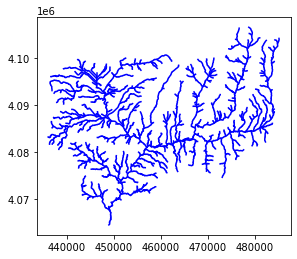

In [17]:
import matplotlib.pyplot as plt

# Extract all channels and plot them
canales = bnet.getChannels("ALL")

fig, ax = plt.subplots()
for canal in canales:
    xy = canal.getXY()
    ax.plot(xy[:,0], xy[:, 1], c="b")
    ax.set_aspect("equal")

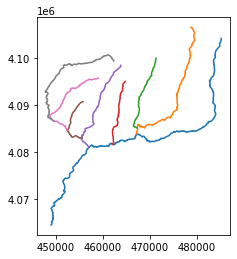

In [18]:
# Extract only the first 8 channels corresponding to the main_heads.shp
canales = bnet.getChannels(8)

fig, ax = plt.subplots()
for canal in canales:
    xy = canal.getXY()
    ax.plot(xy[:,0], xy[:, 1])
    ax.set_aspect("equal")

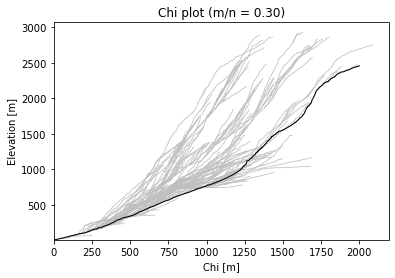

In [19]:
# Make a Chi plot with all the channels
bnet.chiPlot()

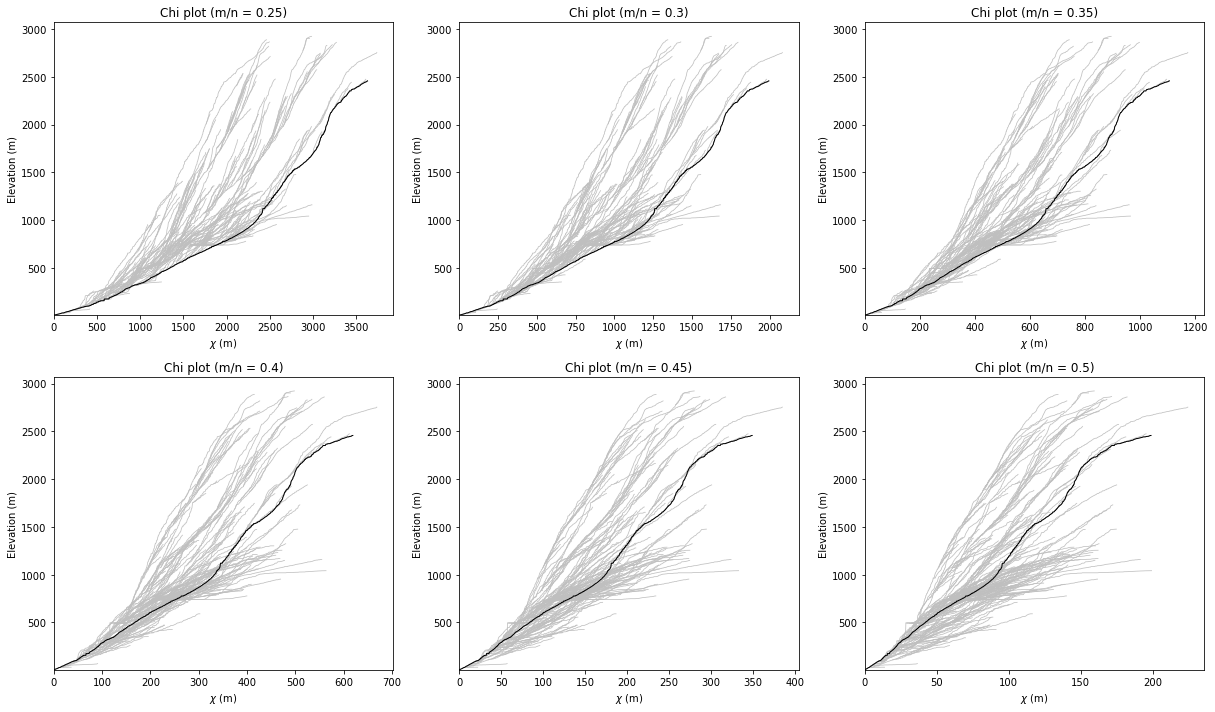

In [20]:
# It is posible to check different n/m values within the basin (this can take a while)
mn_vals = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

fig = plt.figure(figsize=(17, 10))

for n, mn in enumerate(mn_vals):
    bnet.calculateChi(mn)
    ax = fig.add_subplot(2, 3, n+1)
    bnet.chiPlot(ax)
    ax.set_title("Chi plot (m/n = {})".format(mn))
    ax.set_xlabel("$\\chi$ (m)")
    ax.set_ylabel("Elevation (m)")
    
plt.tight_layout()